In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

In [ ]:

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.5"
}

base_url = "https://www.amazon.com/s?k=mobile+phones&page={}"

In [ ]:
products = []
page = 1

In [ ]:
while len(products) < 50:
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    items = soup.select("div[data-component-type='s-search-result']")
    if not items:
        print("No more items found, stopping.")
        break

    for item in items:
        if len(products) >= 50:
            break

        try:
            name_elem = item.select_one("h2 span")
            link_elem = item.select_one("a[href*='/dp/']")
            rating_elem = item.select_one("span.a-icon-alt")

            # Price elements
            original_price_elem = item.select_one("span.a-text-price .a-offscreen")
            current_price_elem = item.select_one("span.a-price > span.a-offscreen")

            name = name_elem.get_text(strip=True) if name_elem else None
            if not name:
                continue

            brand = name.split()[0]
            if brand.lower() == 'apple':  # skip apple because of it have more than a price for its products
                continue

            link = "https://www.amazon.com" + link_elem["href"] if link_elem else None
            rating = float(rating_elem.get_text(strip=True).split()[0]) if rating_elem else None

            # Parse prices safely
            def parse_price(elem):
                if elem:
                    text = elem.get_text(strip=True).replace('$', '').replace(',', '')
                    try:
                        return float(text)
                    except:
                        return None
                return None

            original_price = parse_price(original_price_elem)
            current_price = parse_price(current_price_elem)

            # If original price missing, assume no discount, use current price as original price too
            if current_price is None:
                continue  # skip if no price at all

            if original_price is None:
                original_price = current_price

            # Calculate discount if applicable
            discount = round((original_price - current_price) / original_price * 100, 2) if original_price > current_price else 0.0

            products.append({
                "Name": name,
                "Brand": brand,
                "Product URL": link,
                "Rating": rating,
                "Original Price": original_price,
                "Current Price": current_price,
                "Discount (%)": discount
            })

        except Exception as e:
            print("Skipping item due to error:", e)

    page += 1
    time.sleep(2)

df = pd.DataFrame(products)
df.to_csv("amazon_phones_50.csv", index=False)

print(f"Scraped {len(df)} products with price info.")
print(df.head())


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraped 50 products with price info.
                                                Name     Brand  \
0  Samsung Galaxy A16 5G A Series Cell Phone, Unl...   Samsung   
1  Motorola Moto G 5G | 2024 | Unlocked | Made fo...  Motorola   
2  Tracfone | Motorola Moto g Play 2024 | Locked ...  Tracfone   
3  Samsung Galaxy S21 5G, US Version, 128GB, Phan...   Samsung   
4  Samsung Galaxy A14 5G A Series, Factory Unlock...   Samsung   

                                         Product URL  Rating  Original Price  \
0  https://www.amazon.com/SAMSUNG-Unlocked-Smartp...     4.2          199.99   
1  https://www.amazon.com/Moto-Unlocked-128GB-Cam...     4.3          165.72   
2  https://www.amazon.com/Tracfone-Motorola-5000m...     4.3           39.88   
3  https://www.amazon.com/Samsung-Galaxy-S21-5G-V...     3.9          299.88   
4  https://www.amazon.com/SAMSUNG-Factory-Unlocke...     3.8           99.92   

   Curren

In [ ]:
df.shape

(50, 7)

In [ ]:
df.columns

Index(['Name', 'Brand', 'Product URL', 'Rating', 'Original Price',
       'Current Price', 'Discount (%)'],
      dtype='object')

In [ ]:
df

,Name,Brand,Product URL,Rating,Original Price,Current Price,Discount (%)
0,"Samsung Galaxy A16 5G A Series Cell Phone, Unl...",Samsung,https://www.amazon.com/SAMSUNG-Unlocked-Smartp...,4.2,199.99,176.00,12.00
1,Motorola Moto G 5G | 2024 | Unlocked | Made fo...,Motorola,https://www.amazon.com/Moto-Unlocked-128GB-Cam...,4.3,165.72,165.72,0.00
2,Tracfone | Motorola Moto g Play 2024 | Locked ...,Tracfone,https://www.amazon.com/Tracfone-Motorola-5000m...,4.3,39.88,39.88,0.00
3,"Samsung Galaxy S21 5G, US Version, 128GB, Phan...",Samsung,https://www.amazon.com/Samsung-Galaxy-S21-5G-V...,3.9,299.88,182.80,39.04
4,"Samsung Galaxy A14 5G A Series, Factory Unlock...",Samsung,https://www.amazon.com/SAMSUNG-Factory-Unlocke...,3.8,99.92,99.92,0.00
5,"SAMSUNG Galaxy A15 (SM-155M/DSN), 128GB 6GB RA...",SAMSUNG,https://www.amazon.com/SAMSUNG-SM-155M-DSN-Unl...,4.3,159.99,159.99,0.00
6,Nokia 105 4G | Dual SIM | GSM Unlocked Mobile ...,Nokia,https://www.amazon.com/Nokia-Unlocked-Charcoal...,3.8,34.99,34.99,0.00
7,Samsung Galaxy S22+ 5G S906U 128GB GSM/CDMA Un...,Samsung,https://www.amazon.com/SAMSUNG-Galaxy-S22-Vers...,4.2,254.99,228.00,10.58
8,Samsung Galaxy A15 A155M 128GB Dual-SIM GSM Un...,Samsung,https://www.amazon.com/Samsung-SM-155M-DSN-Unl...,4.3,171.58,171.58,0.00
9,"SAMSUNG Galaxy A05 (128GB, 4GB) 6.7"" Dual SIM ...",SAMSUNG,https://www.amazon.com/SAMSUNG-Galaxy-A05-Unlo...,4.2,105.00,105.00,0.00


In [ ]:
import numpy as np

# Replace 0 with NaN in all columns except "Discount (%)"
cols_to_replace = df.columns.difference(['Discount (%)'])
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)


In [ ]:
df.isnull().sum()

,0
Name,0
Brand,0
Product URL,0
Rating,1
Original Price,0
Current Price,0
Discount (%),0


In [ ]:
df.shape

(50, 7)

In [ ]:
from google.colab import files
files.download('amazon_phones_50.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Average product price
avg_price = df["Original Price"].mean()
print(f"Average product price: {avg_price:.2f}")

# 2. Average discount
avg_discount = df["Discount (%)"].mean()
print(f"Average discount: {avg_discount:.2f}%")

# 3. Top 5 most expensive products
top5_expensive = df.sort_values("Original Price", ascending=False).head(5)
print("\nTop 5 most expensive products:")
print(top5_expensive[["Name", "Brand", "Original Price"]])

# 4. Number of products with ratings
num_rated = df["Rating"].notna().sum()
print(f"\nNumber of products with ratings: {num_rated}")

# 5. Most common brand
most_common_brand = df["Brand"].mode()[0]
print(f"Most common brand: {most_common_brand}")


Average product price: 277.83
Average discount: 10.58%

Top 5 most expensive products:
                                                 Name     Brand  \
18  SAMSUNG Galaxy Z Fold 6 AI Cell Phone, 512GB U...   SAMSUNG   
17  SAMSUNG Galaxy S25+ Cell Phone, 256GB AI Smart...   SAMSUNG   
39  OnePlus 12,16GB RAM+512GB,Dual-SIM,Unlocked An...   OnePlus   
27  REDMAGIC 10 Pro Smartphone 5G, 144Hz Gaming Ph...  REDMAGIC   
21  SAMSUNG Galaxy S24 FE AI Phone, 128GB Unlocked...   SAMSUNG   

    Original Price  
18         2019.99  
17          999.99  
39          899.99  
27          749.00  
21          649.99  

Number of products with ratings: 49
Most common brand: Samsung


<ipython-input-13-dba9f0424eab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")


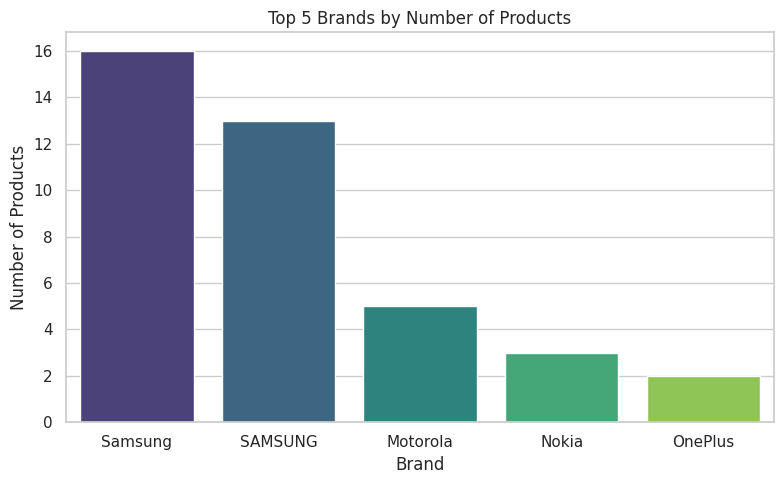

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Count top 5 brands
top_brands = df['Brand'].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.title("Top 5 Brands by Number of Products")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


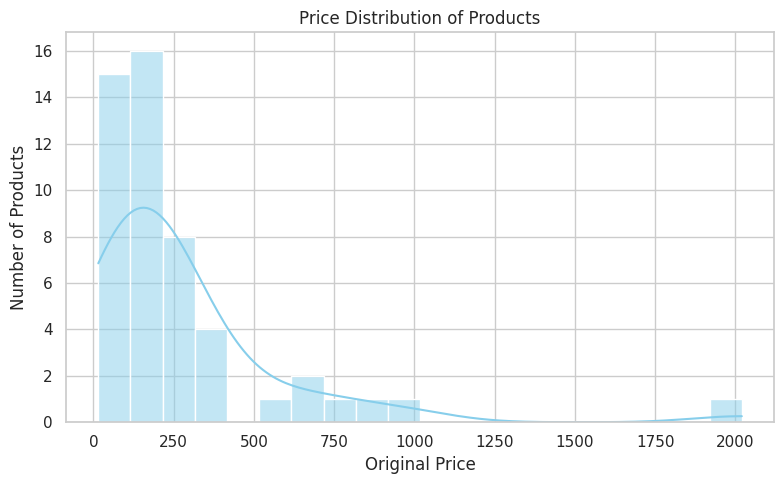

In [ ]:
# Plot histogram of original prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Original Price'], bins=20, kde=True, color='skyblue')
plt.title("Price Distribution of Products")
plt.xlabel("Original Price")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


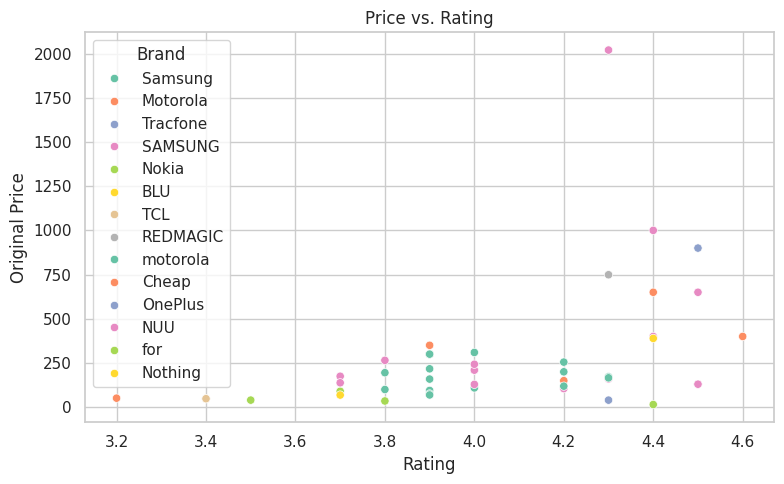

In [ ]:
# Drop rows where Rating or Price is NaN
scatter_df = df.dropna(subset=['Rating', 'Original Price'])

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=scatter_df, x="Rating", y="Original Price", hue="Brand", palette="Set2")
plt.title("Price vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Original Price")
plt.tight_layout()
plt.show()


## 🔍 Insights

- **Customers are receiving good discounts**  
The average discount is 6.46%, indicating that many products are available at significantly reduced prices compared to their original prices.

- **Top-rated products are more expensive on average**  
Highly-rated products (rating ≥ 4) have an average current price of 335.43 Dollars, compared to 130.62 Dollars for lower-rated products.

- **There is a leading brand**  
The brand ***SAMSUNG*** dominates this category with 14 products, accounting for 28.00% of all products.

- **Most products are rated**  
50 out of 50 products (100.00%) have ratings, indicating high customer interaction and trust in reviews.